In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from math import sqrt,pi, exp, pow
import statistics
import random as rand
#sklearn preprocesiranje
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
#za detekciju outliera
from sklearn.ensemble import IsolationForest
#redukcija dimenzionalnosi
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d  
#sklearn model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

In [3]:
#ucitavanje data seta
file_name = "responses.csv"
data = pd.read_csv(file_name)
data.head(20)

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0     5.0                       3.0    2.0   1.0      2.0              2.0   
1     4.0                       4.0    2.0   1.0      1.0              1.0   
2     5.0                       5.0    2.0   2.0      3.0              4.0   
3     5.0                       3.0    2.0   1.0      1.0              1.0   
4     5.0                       3.0    4.0   3.0      2.0              4.0   
5     5.0                       3.0    2.0   3.0      2.0              3.0   
6     5.0                       5.0    5.0   3.0      1.0              2.0   
7     5.0                       3.0    3.0   2.0      1.0              2.0   
8     5.0                       3.0    3.0   1.0      1.0              2.0   
9     5.0                       3.0    2.0   5.0      2.0              2.0   
10    5.0                       3.0    3.0   2.0      1.0              2.0   
11    5.0                       3.0    1.0   1.0      1.0              4.0   
12    5.0                       3.0    1.0   2.0      1.0              4.0   
13    5.0                       3.0    5.0   3.0      2.0              1.0   
14    5.0                       3.0    2.0   1.0      1.0              2.0   
15    1.0                       3.0    2.0   2.0      3.0              4.0   
16    5.0                       3.0    3.0   1.0      1.0              1.0   
17    5.0                       3.0    3.0   3.0      3.0              2.0   
18    5.0                       3.0    5.0   4.0      3.0              4.0   
19    5.0                       4.0    3.0   3.0      2.0              4.0   

    Musical  Pop  Rock  Metal or Hardrock  ...   Age  Height  Weight  \
0       1.0  5.0   5.0                1.0  ...  20.0   163.0    48.0   
1       2.0  3.0   5.0                4.0  ...  19.0   163.0    58.0   
2       5.0  3.0   5.0                3.0  ...  20.0   176.0    67.0   
3       1.0  2.0   2.0                1.0  ...  22.0   172.0    59.0   
4       3.0  5.0   3.0                1.0  ...  20.0   170.0    59.0   
5       3.0  2.0   5.0                5.0  ...  20.0   186.0    77.0   
6       2.0  5.0   3.0                1.0  ...  20.0   177.0    50.0   
7       2.0  4.0   5.0                1.0  ...  19.0   184.0    90.0   
8       4.0  3.0   5.0                5.0  ...  18.0   166.0    55.0   
9       5.0  3.0   5.0                2.0  ...  19.0   174.0    60.0   
10      3.0  4.0   3.0                2.0  ...  19.0   175.0    60.0   
11      1.0  2.0   5.0                1.0  ...  17.0   176.0    60.0   
12      3.0  3.0   5.0                4.0  ...  24.0   168.0    55.0   
13      5.0  5.0   2.0                1.0  ...  19.0   165.0    55.0   
14      3.0  4.0   5.0                2.0  ...  22.0   175.0    57.0   
15      3.0  3.0   5.0                5.0  ...  18.0   177.0    77.0   
16      2.0  4.0   4.0                1.0  ...  19.0   175.0    65.0   
17      2.0  4.0   4.0                2.0  ...  20.0   168.0    65.0   
18      5.0  5.0   4.0                4.0  ...  18.0   181.0    78.0   
19      2.0  2.0   4.0                5.0  ...  18.0   188.0    90.0   

    Number of siblings  Gender  Left - right handed                Education  \
0                  1.0  female         right handed  college/bachelor degree   
1                  2.0  female         right handed  college/bachelor degree   
2                  2.0  female         right handed         secondary school   
3                  1.0  female         right handed  college/bachelor degree   
4                  1.0  female         right handed         secondary school   
5                  1.0    male         right handed         secondary school   
6                  1.0  female         right handed         secondary school   
7                  1.0    male         right handed  college/bachelor degree   
8                  1.0  female         right handed         secondary school   
9                  3.0  female         right handed 

In [4]:
#podela kolona po odgovarajucim grupama
pd.set_option('display.max_columns', None)
data.columns.to_list()
music_cols = ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music',
              'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz',
              'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera']
movie_cols = ['Movies','Horror','Thriller','Comedy','Romantic','Sci-fi','War','Fantasy/Fairy tales',
              'Animated','Documentary', 'Western', 'Action']
hobies_interests = ['History','Psychology','Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 
                    'Biology','Chemistry','Reading','Geography','Foreign languages','Medicine','Law',
                    'Cars','Art exhibitions','Religion','Countryside, outdoors','Dancing','Musical instruments','Writing',
                    'Passive sport','Active sport','Gardening','Celebrities','Shopping','Science and technology',
                    'Theatre','Fun with friends', 'Adrenaline sports','Pets']
phobias = ['Flying','Storm','Darkness','Heights','Spiders','Snakes',
           'Rats', 'Ageing','Dangerous dogs','Fear of public speaking']
health_habits = [ 'Smoking','Alcohol','Healthy eating']
personality_opinion_views_on_life = ['Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism', 
                                     'Thinking ahead','Final judgement','Reliability','Keeping promises',
                                     'Loss of interest','Friends versus money', 'Funniness', 'Fake',
                                     'Criminal damage','Decision making','Elections','Self-criticism','Judgment calls',
                                     'Hypochondria','Empathy','Eating to survive','Giving','Compassion to animals',
                                     'Borrowed stuff','Loneliness','Cheating in school','Health','Changing the past',
                                     'God','Dreams','Charity','Number of friends','Punctuality','Lying','Waiting',
                                     'New environment','Mood swings','Appearence and gestures','Socializing','Achievements',
                                     'Responding to a serious letter','Children','Assertiveness','Getting angry',
                                      'Knowing the right people','Public speaking','Unpopularity','Life struggles',
                                     'Happiness in life','Energy levels','Small - big dogs','Personality',
                                     'Finding lost valuables','Getting up','Interests or hobbies','Parents\' advice',
                                     'Questionnaires or polls','Internet usage']
spending_habits = ['Finances','Shopping centres','Branded clothing','Entertainment spending',
                   'Spending on looks','Spending on gadgets','Spending on healthy eating']
demographics = ['Age','Height','Weight','Number of siblings','Gender','Left - right handed',
                'Education','Only child','Village - town','House - block of flats']

In [5]:
#za analizu koju zelimo da sprovedemo, personality_opinion_views_on_life skup kolona nije relevantan
data = data.drop(personality_opinion_views_on_life, axis='columns')
print(data.columns)

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror',
       'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action',
       'History', 'Psychology', 'Politics', 'Mathematics', 'Physics',
       'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry',
       'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars',
       'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing',
       'Musical instruments', 'Writing', 'Passive sport', 'Active sport',
       'Gardening', 'Celebrities', 'Shopping', 'Science and technology',
       'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying',
       'Storm', 'Darkness', 'Heights', 'Spiders

In [6]:
#za analizu koju zelimo da sprovedemo, music_cols skup kolona nije relevantan
data = data.drop(music_cols, axis='columns')
print(data.columns)

Index(['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action',
       'History', 'Psychology', 'Politics', 'Mathematics', 'Physics',
       'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry',
       'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars',
       'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing',
       'Musical instruments', 'Writing', 'Passive sport', 'Active sport',
       'Gardening', 'Celebrities', 'Shopping', 'Science and technology',
       'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying',
       'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing',
       'Dangerous dogs', 'Fear of public speaking', 'Smoking', 'Alcohol',
       'Healthy eating', 'Finances', 'Shopping centres', 'Branded clothing',
       'Entertainment spending', 'Spending on looks', 'Spending on gadgets',
       'Spending on 

In [7]:
#prikaz tipova podataka za odgovarajuce kolone
with pd.option_context('display.max_rows', None): 
    display(data.dtypes)

Movies                        float64
Horror                        float64
Thriller                      float64
Comedy                        float64
Romantic                      float64
Sci-fi                        float64
War                           float64
Fantasy/Fairy tales           float64
Animated                      float64
Documentary                   float64
Western                       float64
Action                        float64
History                       float64
Psychology                    float64
Politics                      float64
Mathematics                   float64
Physics                       float64
Internet                      float64
PC                            float64
Economy Management            float64
Biology                       float64
Chemistry                     float64
Reading                       float64
Geography                     float64
Foreign languages             float64
Medicine                      float64
Law         

In [8]:
#prikaz deskriptivne statistike za kolone za koje ima smisla to raditi
data.describe()

Movies       Horror     Thriller       Comedy     Romantic  \
count  1004.000000  1008.000000  1009.000000  1007.000000  1007.000000   
mean      4.613546     2.793651     3.383548     4.494538     3.489573   
std       0.694700     1.411078     1.197951     0.779789     1.209489   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       4.000000     1.000000     3.000000     4.000000     3.000000   
50%       5.000000     3.000000     4.000000     5.000000     4.000000   
75%       5.000000     4.000000     4.000000     5.000000     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

            Sci-fi          War  Fantasy/Fairy tales     Animated  \
count  1008.000000  1008.000000          1007.000000  1007.000000   
mean      3.113095     3.155754             3.749752     3.788481   
std       1.311892     1.348266             1.181761     1.219436   
min       1.000000     1.000000             1.000000     1.000000   
25%       2.000000     2.000000             3.000000     3.000000   
50%       3.000000     3.000000             4.000000     4.000000   
75%       4.000000     4.000000             5.000000     5.000000   
max       5.000000     5.000000             5.000000     5.000000   

       Documentary      Western       Action      History   Psychology  \
count  1002.000000  1006.000000  1008.000000  1008.000000  1005.000000   
mean      3.643713     2.126243     3.536706     3.207341     3.138308   
std       1.133367     1.138633     1.236101     1.263523     1.258349   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       3.000000     1.000000     3.000000     2.000000     2.000000   
50%       4.000000     2.000000     4.000000     3.000000     3.000000   
75%       5.000000     3.000000     5.000000     4.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

          Politics  Mathematics      Physics     Internet           PC  \
count  1009.000000  1007.000000  1007.000000  1006.000000  1004.000000   
mean      2.595639     2.334657     2.064548     4.175944     3.136454   
std       1.294456     1.352496     1.227098     0.920663     1.321766   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     4.000000     2.000000   
50%       2.000000     2.000000     2.000000     4.000000     3.000000   
75%       4.000000     3.000000     3.000000     5.000000     4.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

       Economy Management      Biology    Chemistry      Reading    Geography  \
count         1005.000000  1004.000000  1000.000000  1004.000000  1001.000000   
mean             2.643781     2.665339     2.165000     3.159363     3.082917   
std              1.347298     1.384127     1.378287     1.495924     1.282232   
min              1.000000     1.000000     1.000000     1.000000     1.000000   
25%              1.000000     2.000000     1.000000     2.000000     2.000000   
50%              2.000000     2.000000     2.000000     3.000000     3.000000   
75%              4.000000     4.000000     3.000000     5.000000     4.000000   
max              5.000000     5.000000     5.000000     5.000000     5.000000   

       Foreign languages     Medicine          Law         Cars  \
count        1005.000000  1005.000000  1009.000000  1006.000000   
mean            3.778109     2.516418     2.256690     2.686879   
std             1.141188     1.380347     1.242644     1.440829   
min             1.000000     1.000000     1.000000     1.000000   
25%             3.000000     1.000000     1.000000     1.000000   
50%             4.000000     2.000000     2.000000     3.000000   
75%             5.000000     3.000000     3.000000     4.000000   
max             5.000000     5.000000     5.000000     5.000000   

       Art exhibitions     Religion  Countryside, outdo

In [9]:
#provera da li ima null vrednosti
with pd.option_context('display.max_rows', None): 
    display(data.isnull().sum().sort_values(ascending = False))

Weight                        20
Height                        20
Passive sport                 15
Chemistry                     10
Geography                      9
Theatre                        8
Documentary                    8
Smoking                        8
Age                            7
Gardening                      7
Countryside, outdoors          7
Science and technology         6
Art exhibitions                6
Reading                        6
Biology                        6
PC                             6
Movies                         6
Number of siblings             6
Gender                         6
Writing                        6
Psychology                     5
Economy Management             5
Spiders                        5
Alcohol                        5
Foreign languages              5
Medicine                       5
Fun with friends               4
Pets                           4
Active sport                   4
Village - town                 4
House - bl

In [10]:
#popunjavanje null vrednosti za visinu, masu i godine srednjom vrednoscu
demographic_cols = ['Height','Weight','Age']
for col in demographic_cols:
     mean = data[col].mean()
     data[col] = data[col].fillna(mean)
print(data[demographic_cols].isna().sum().sort_values(ascending=False))

Height    0
Weight    0
Age       0
dtype: int64


In [11]:
#popunjavanje null vrednosti vrednoscu koja se najcesce pojavljuje za kolone sa makar jednom null vrednoscu
has_null_cols = data.columns[data.isnull().any()]
print(has_null_cols) 
for col in has_null_cols:
     mode = data[col].mode()[0]
     data[col] = data[col].fillna(mode)
print(data[has_null_cols].isna().sum().sort_values(ascending=False))

Index(['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War',
       'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action',
       'History', 'Psychology', 'Politics', 'Mathematics', 'Physics',
       'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry',
       'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars',
       'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing',
       'Musical instruments', 'Writing', 'Passive sport', 'Active sport',
       'Gardening', 'Celebrities', 'Shopping', 'Science and technology',
       'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying',
       'Storm', 'Darkness', 'Heights', 'Spiders', 'Rats', 'Ageing',
       'Dangerous dogs', 'Fear of public speaking', 'Smoking', 'Alcohol',
       'Healthy eating', 'Finances', 'Shopping centres', 'Branded clothing',
       'Entertainment spending', 'Spending on looks',
       'Spending on healthy eating', 'Number of sibli

In [12]:
demographics_short = ['Age', 'Gender', 'Education', 'Only child', 'Village - town']

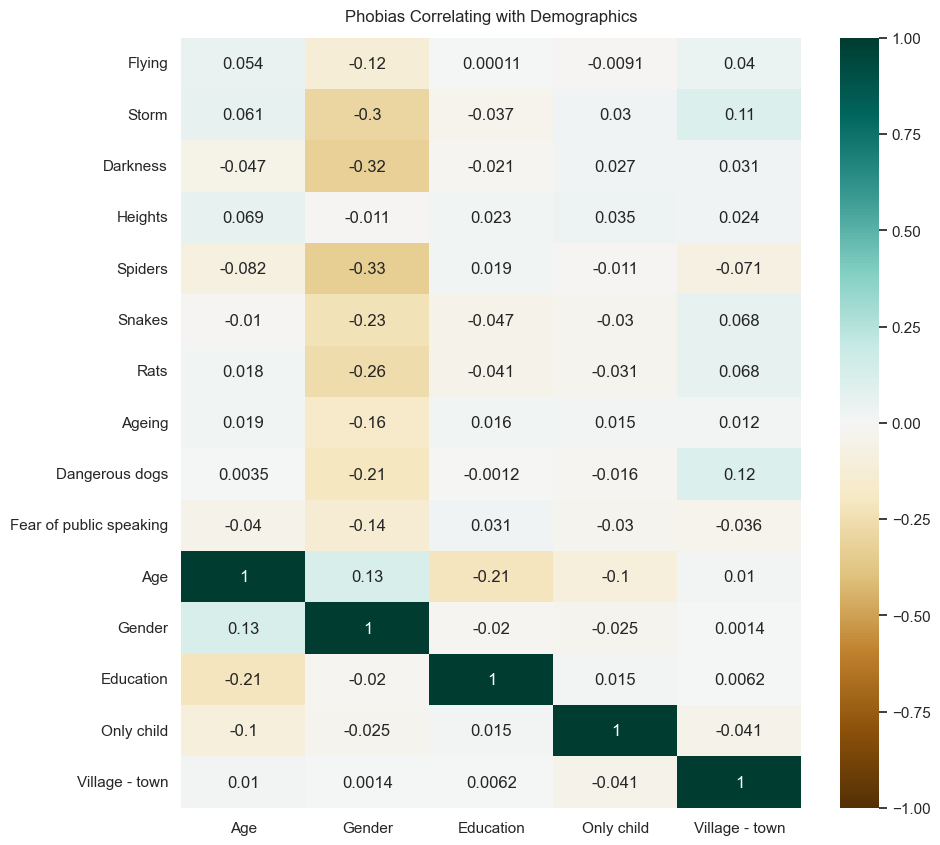

In [113]:
# korelacija: demographics_short i phobias
demo_phobias = data.copy()
demo_phobias = demo_phobias.drop(movie_cols, axis='columns')
demo_phobias = demo_phobias.drop(hobies_interests, axis='columns')
demo_phobias = demo_phobias.drop(health_habits, axis='columns')
demo_phobias = demo_phobias.drop(spending_habits, axis='columns')
demo_phobias = demo_phobias.drop(['Height','Weight','Number of siblings','Left - right handed','House - block of flats'], axis='columns')
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(demo_phobias.corr()[demographics_short], annot=True, vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Phobias Correlating with Demographics', fontdict={'fontsize':12}, pad=12);

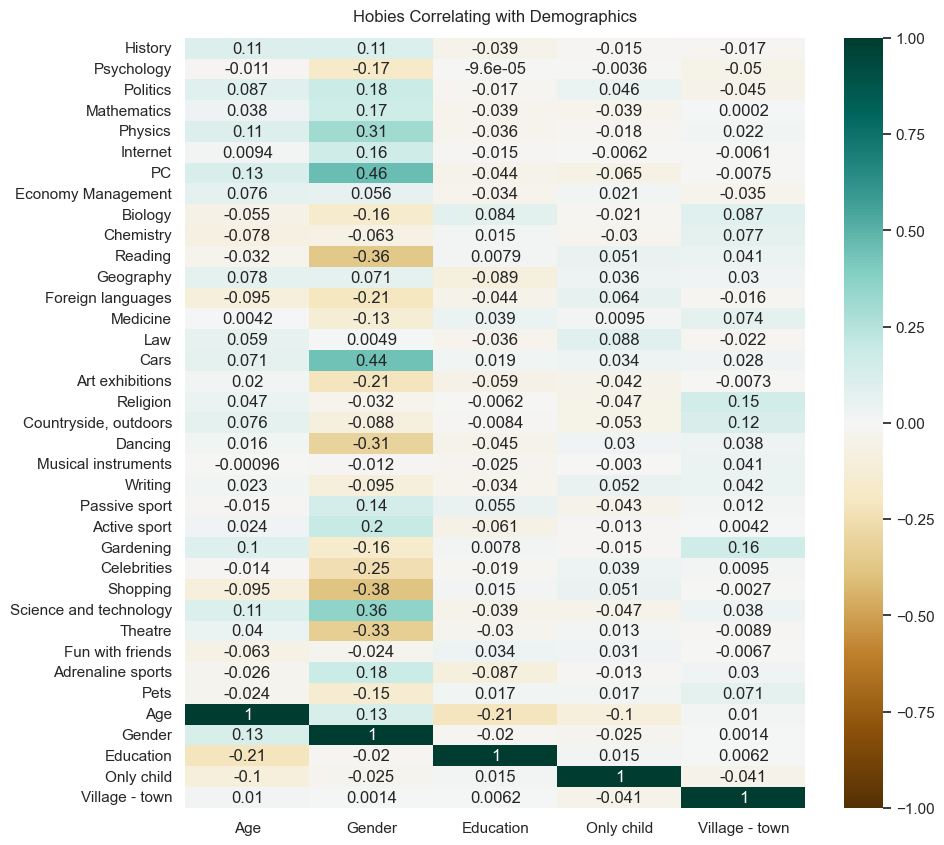

In [436]:
# koleracija: demographics_short i hobies
demo_hobies = data.copy()
demo_hobies = demo_hobies.drop(movie_cols, axis='columns')
demo_hobies = demo_hobies.drop(phobias, axis='columns')
demo_hobies = demo_hobies.drop(health_habits, axis='columns')
demo_hobies = demo_hobies.drop(spending_habits, axis='columns')
demo_hobies = demo_hobies.drop(['Height','Weight','Number of siblings','Left - right handed','House - block of flats'], axis='columns')
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(demo_hobies.corr()[demographics_short], annot=True, vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Hobies Correlating with Demographics', fontdict={'fontsize':12}, pad=12);

In [14]:
#za kolone iz skupa cols_to_encode cemo vrsiti enkodiranje
cols_to_encode = ['Smoking','Alcohol','Gender', 'Education','Left - right handed',
                  'Only child','Village - town', 'House - block of flats']
label_encoder = LabelEncoder()
for col in cols_to_encode:
    data[col] = label_encoder.fit_transform(data[col])
    label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(label_encoder_name_mapping)

{'current smoker': 0, 'former smoker': 1, 'never smoked': 2, 'tried smoking': 3}
{'drink a lot': 0, 'never': 1, 'social drinker': 2}
{'female': 0, 'male': 1}
{'college/bachelor degree': 0, 'currently a primary school pupil': 1, 'doctorate degree': 2, 'masters degree': 3, 'primary school': 4, 'secondary school': 5}
{'left handed': 0, 'right handed': 1}
{'no': 0, 'yes': 1}
{'city': 0, 'village': 1}
{'block of flats': 0, 'house/bungalow': 1}


In [15]:
#provera da li ima duplikata
duplicates = data.duplicated().sum()
print('Number of duplicates found: ' + str(duplicates))
data = data.drop_duplicates()

Number of duplicates found: 0


In [16]:
#izvrsavamo normalizaciju kako bismo videli da li ce rezultati na taj nacin biti bolji
num_cols = data.select_dtypes(include=['int64','float64']).columns
min_max_scaler = MinMaxScaler()
data_norm = data.copy()
data_norm[num_cols] = min_max_scaler.fit_transform(data_norm[num_cols])
print(data_norm.head(20))

    Movies  Horror  Thriller  Comedy  Romantic  Sci-fi   War  \
0     1.00    0.75      0.25    1.00      0.75    0.75  0.00   
1     1.00    0.25      0.25    0.75      0.50    0.75  0.00   
2     1.00    0.50      0.75    0.75      0.25    0.75  0.25   
3     1.00    0.75      0.75    0.50      0.50    0.75  0.50   
4     1.00    0.75      0.75    1.00      0.25    0.50  0.50   
5     1.00    1.00      1.00    1.00      0.25    0.50  0.50   
6     0.75    0.25      0.00    1.00      0.50    0.00  0.50   
7     1.00    0.75      0.75    1.00      0.25    0.50  0.50   
8     1.00    0.00      1.00    1.00      0.75    0.75  1.00   
9     1.00    0.25      0.00    1.00      1.00    0.00  0.50   
10    1.00    1.00      0.75    1.00      0.50    0.50  0.25   
11    1.00    0.50      0.75    0.75      0.50    0.25  1.00   
12    1.00    0.00      1.00    0.75      0.50    0.00  0.75   
13    1.00    0.50      0.25    1.00      1.00    0.25  0.00   
14    0.75    0.00      0.50    1.00    

In [17]:
#detekcija outliera pomocu iqr
def find_outliers(df, col_name):
    q1 = data_norm[col_name].quantile(0.25)
    q3=  data_norm[col_name].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = data_norm[((data_norm[col_name]<(q1-1.5*iqr)) | (data_norm[col_name]>(q3+1.5*iqr)))]
    return outliers
cols_to_use = data_norm[data_norm.columns]
total_outlier_num=0
cols = cols_to_use.columns.values
num_cols=[]
for col in cols:
    num = find_outliers(cols_to_use, col)
    num_cols.append(len(num))
new_data_frame = pd.DataFrame()
new_data_frame['Feature']= cols
new_data_frame['Number of Outliers']= num_cols
with pd.option_context('display.max_rows', None): 
    display(new_data_frame.sort_values(by='Number of Outliers', ascending = False))

Feature  Number of Outliers
69         Left - right handed                 101
56              Healthy eating                  81
2                     Thriller                  77
64                         Age                  52
17                    Internet                  44
63  Spending on healthy eating                  41
67          Number of siblings                  31
3                       Comedy                  26
41            Fun with friends                  23
0                       Movies                  13
66                      Weight                  10
65                      Height                   6
53     Fear of public speaking                   0
44                      Flying                   0
45                       Storm                   0
46                    Darkness                   0
47                     Heights                   0
43                        Pets                   0
48                     Spiders                   0
49                      Snakes                   0
50                        Rats                   0
42           Adrenaline sports                   0
51                      Ageing                   0
52              Dangerous dogs                   0
58            Shopping centres                   0
54                     Smoking                   0
55                     Alcohol                   0
57                    Finances                   0
39      Science and technology                   0
59            Branded clothing                   0
60      Entertainment spending                   0
61           Spending on looks                   0
62         Spending on gadgets                   0
68                      Gender                   0
70                   Education                   0
71                  Only child                   0
72              Village - town                   0
40                     Theatre                   0
37                 Celebrities                   0
38                    Shopping                   0
11                      Action                   0
18                          PC                   0
16                     Physics                   0
15                 Mathematics                   0
14                    Politics                   0
13                  Psychology                   0
12                     History                   0
10                     Western                   0
20                     Biology                   0
9                  Documentary                   0
8                     Animated                   0
7          Fantasy/Fairy tales                   0
6                          War                   0
5                       Sci-fi                   0
4                     Romantic                   0
19          Economy Management                   0
21                   Chemistry                   0
1                       Horror                   0
30       Countryside, outdoors                   0
36                   Gardening                   0
35                Active sport                   0
34               Passive sport                   0
33                     Writing                   0
32         Musical instruments                   0
31                     Dancing                   0
29                    Religion                   0
22                     Reading                   0
28             Art exhibitions                   0
27                        Cars                   0
26                         Law                   0
25                    Medicine                   0
24           Foreign languages                   0
23                   Geography                   0
73      House - block of flats                   0

In [18]:
def delete_outliers(data):
    isolation_forest = IsolationForest(n_estimators = 100, contamination = 0.05, max_samples = 'auto')
    outlier_prediction = isolation_forest.fit_predict(data_norm[data_norm.columns.difference(['Class'])].values)
    print("Number of normal values detected: {}".format(outlier_prediction[outlier_prediction  == 1].sum()))
    print("Number of outliers detected: {}".format(abs(outlier_prediction[outlier_prediction == -1].sum())))
    data_no_outliers = data_norm.copy()
    data_no_outliers['Is_Outlier'] = outlier_prediction
    data_no_outliers.drop(data_no_outliers[(data_no_outliers['Is_Outlier'] == -1)].index, axis = 0, inplace=True)
    data_no_outliers = data_no_outliers[data_no_outliers.columns.difference(['Is_Outlier'])]
    print('Number of values after eliminating outliers: ' + str(len(data_no_outliers)))
    return data_no_outliers
data_no_outliers = delete_outliers(data_norm)

Number of normal values detected: 959
Number of outliers detected: 51
Number of values after eliminating outliers: 959


In [90]:
#pravimo podskup dataseta za dalju analizu
cols_to_use = health_habits + spending_habits
data_subset = data_no_outliers[cols_to_use]
print(data_subset.head(10))

    Smoking  Alcohol  Healthy eating  Finances  Shopping centres  \
0         2        0            0.75      0.50              0.75   
1         2        0            0.50      0.50              0.75   
2         3        0            0.50      0.25              0.75   
4         3        2            0.75      0.75              0.50   
5         2        1            0.25      0.25              0.50   
6         3        2            0.75      0.75              0.50   
7         0        0            0.25      0.50              0.75   
8         3        2            0.00      0.25              0.00   
9         2        0            0.50      0.75              0.75   
10        0        2            0.50      0.25              0.75   

    Branded clothing  Entertainment spending  Spending on looks  \
0               1.00                    0.50               0.50   
1               0.00                    0.75               0.25   
2               0.00                    0.75      

[0.51926061 0.23439874 0.08325928 0.03525072 0.03092745]


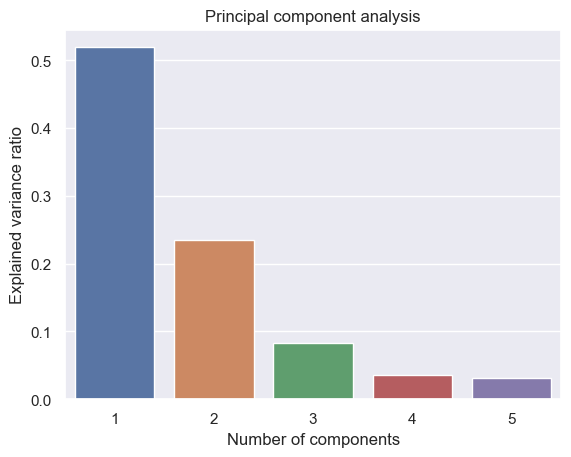

In [91]:
#radimo redukciju dimenzionalnosti sa Principal Component Analysis da bismo se prebacili u prostor nize dimenzije
pca = PCA(n_components=5)
principal_components = pca.fit_transform(data_subset)
print(pca.explained_variance_ratio_)
features = list(range(1, pca.n_components+1))
#radimo vizuelizaciju rezultata da bismo videli optimalan broj komponenti
sns.set()
sns.barplot(x = features, y= pca.explained_variance_ratio_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.title("Principal component analysis")
plt.show()

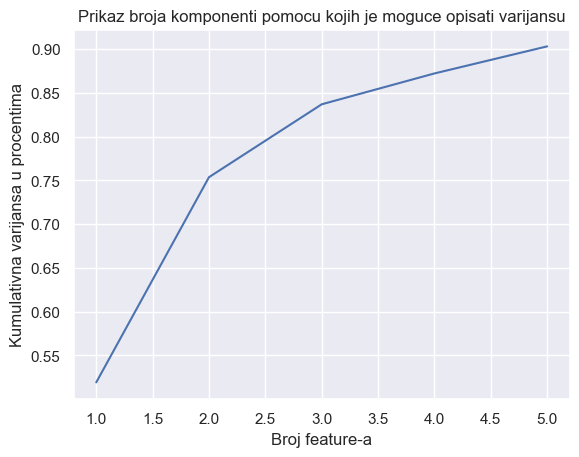

In [92]:
#kumulativna varijansa sa prikazom broja komponenti pomocu kojih je moguce opisati varijansu
fig, ax = plt.subplots()
x = np.arange(1,6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Broj feature-a')
plt.ylabel('Kumulativna varijansa u procentima')
plt.title('Prikaz broja komponenti pomocu kojih je moguce opisati varijansu')
plt.plot(x,y)
plt.show()

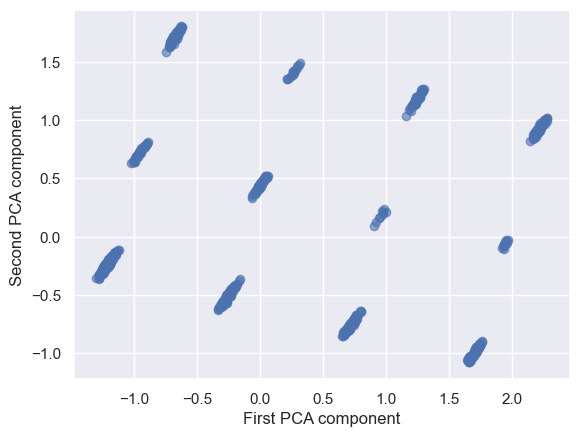

In [93]:
#dvodimenzionalna vizuelizacija podataka dobijenih pomocu PCA
pca_components = pd.DataFrame(principal_components)
plt.scatter(pca_components[0], pca_components[1], alpha = .6)
plt.xlabel('First PCA component')
plt.ylabel('Second PCA component')
plt.show()

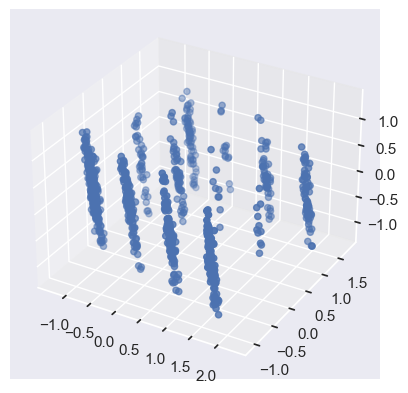

In [94]:
#prikaz u trodimenzionalnom prostoru
ax = plt.axes(projection ="3d")  
ax.scatter3D(pca_components[0], pca_components[1], pca_components[2])
plt.show()

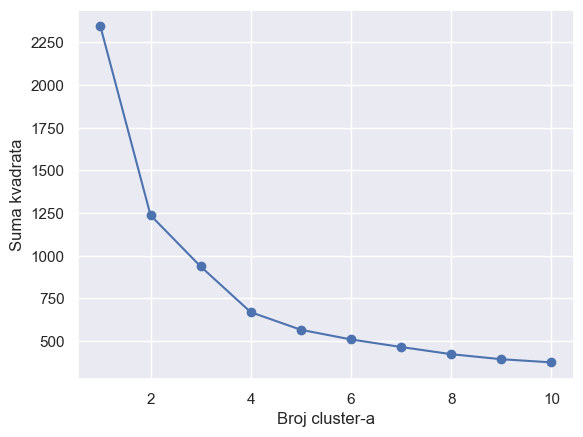

In [95]:
#trazimo optimalan broj klustera
sum_of_squares = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(principal_components)
    sum_of_squares.append(k_means.inertia_)
plt.plot(range(1,11), sum_of_squares, marker = 'o')
plt.xlabel('Broj cluster-a')
plt.ylabel('Suma kvadrata')
plt.show()

In [97]:
#na osnovu ovog grafikona zakljucujemo da bi optimalan broj klastera bio 4 ili 5 ('elbow method koriscen')
kmeans_model = KMeans(n_clusters = 4)
clusters = kmeans_model.fit_predict(data_subset)
data_subset['Cluster_No'] = clusters
score = silhouette_score(data_subset, clusters)
print(score)

0.5013585093638913


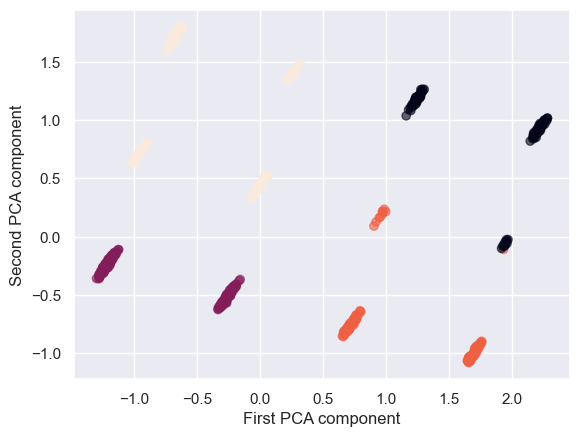

In [98]:
#vizuelizacija rezultata za kmeans
pca_components = pd.DataFrame(principal_components)
plt.scatter(pca_components[0], pca_components[1], c =data_subset['Cluster_No'],alpha = .6)
plt.xlabel('First PCA component')
plt.ylabel('Second PCA component')
plt.show()

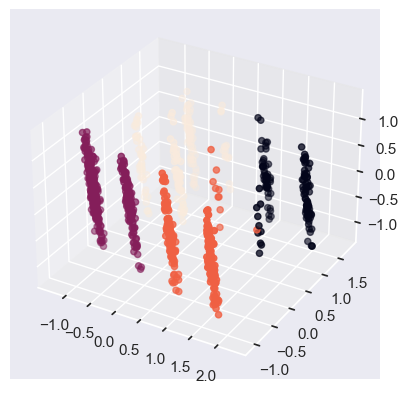

In [99]:
#vizuelizacija dobijenih rezultata u trodimenzionalnom prostoru
ax = plt.axes(projection ="3d") 
ax.scatter3D(pca_components[0], pca_components[1], pca_components[2], c = data_subset['Cluster_No'])
plt.show()

In [100]:
#prikaz broja clanova po klasteru
print(data_subset['Cluster_No'].value_counts())

1    438
2    213
3    177
0    131
Name: Cluster_No, dtype: int64


In [34]:
#prikaz kodiranje radi tumacenja rezultata
#{'current smoker': 0, 'former smoker': 1, 'never smoked': 2, 'tried smoking': 3}
#{'drink a lot': 0, 'never': 1, 'social drinker': 2}

**U klasteru broj 0 su osobe koje trenutno puse ili su bivsi pusaci. Ovo je ujedno i najmanji klaster.**

Sto se tice alkohola, vecina njih se izjasnila da imaju visoku konzumaciju istog. Samo 2 pripadnika su se izjasnila da se hrane maksimalno zdravo, ostali su na srednjem nivou. Sto se finansija tice, vise pripadnika ne stedi novac adekvatno. 
Veci broj ispitanika voli da ide u velike shopping centre i preferira brendiranu odecu. Vecina voli da potrosi novac na izgled, kvalitetnu hranu i provod, a manje na gadget-e. 


In [101]:
#istrazivanje nultog klastera (najmanji klaster po broju clanova)
data_cluster_one = data_subset[data_subset['Cluster_No'] == 0]
for col in health_habits: 
    print(data_cluster_one[col].value_counts())
for col in spending_habits: 
    print(data_cluster_one[col].value_counts())

0    81
1    50
Name: Smoking, dtype: int64
0    121
1     10
Name: Alcohol, dtype: int64
0.50    67
0.75    26
0.25    18
0.00    18
1.00     2
Name: Healthy eating, dtype: int64
0.25    36
0.50    32
0.00    30
0.75    25
1.00     8
Name: Finances, dtype: int64
0.75    44
0.50    32
1.00    21
0.25    19
0.00    15
Name: Shopping centres, dtype: int64
0.75    42
0.50    34
1.00    26
0.00    17
0.25    12
Name: Branded clothing, dtype: int64
0.75    45
1.00    39
0.50    35
0.25    10
0.00     2
Name: Entertainment spending, dtype: int64
0.75    42
0.50    33
0.25    25
1.00    20
0.00    11
Name: Spending on looks, dtype: int64
0.25    32
0.50    30
0.75    26
1.00    22
0.00    21
Name: Spending on gadgets, dtype: int64
0.75    43
0.50    40
0.25    21
1.00    21
0.00     6
Name: Spending on healthy eating, dtype: int64


In [36]:
#prikaz kodiranje radi tumacenja rezultata
#{'current smoker': 0, 'former smoker': 1, 'never smoked': 2, 'tried smoking': 3}
#{'drink a lot': 0, 'never': 1, 'social drinker': 2}

**U klasteru broj 1 su osobe koje nikada nisu pusile ili koje su nekada u zivotu probale cigarete. Ovo je najveci klaster.**

Sto se tice alkohola, svi su se izjasnili da piju samo na drustvenim desavanjima (social drinker). Sto se zdrave ishrane tice, vecina ispitanika pripada kategoriji 'srednje - u potpunosti se slaze'. Slicno vazi i za finansije, odlazak u velike shopping centre i preferiranje brendirane odece. Za razliku od prethodnog klastera, manje trose novac na provod i na izgled. Vecina njih trosi novac na zdravu i kvalitetnu hranu, a manje na gadget-e.


In [102]:
#istrazivanje prvog klastera (najveci klaster)
data_cluster_zero = data_subset[data_subset['Cluster_No'] == 1]
for col in health_habits: 
    print(data_cluster_zero[col].value_counts())
for col in spending_habits: 
    print(data_cluster_zero[col].value_counts())

3    312
2    126
Name: Smoking, dtype: int64
2    438
Name: Alcohol, dtype: int64
0.50    238
0.75    106
0.25     53
0.00     24
1.00     17
Name: Healthy eating, dtype: int64
0.50    173
0.75    123
0.25     60
1.00     51
0.00     31
Name: Finances, dtype: int64
0.50    111
0.75    100
1.00     92
0.25     87
0.00     48
Name: Shopping centres, dtype: int64
0.50    128
0.75    108
0.25     76
0.00     73
1.00     53
Name: Branded clothing, dtype: int64
0.50    152
0.25    104
0.75     82
0.00     51
1.00     49
Name: Entertainment spending, dtype: int64
0.50    135
0.25    110
0.75    101
0.00     51
1.00     41
Name: Spending on looks, dtype: int64
0.25    129
0.50    113
0.75     80
0.00     71
1.00     45
Name: Spending on gadgets, dtype: int64
0.75    150
0.50    131
1.00     90
0.25     54
0.00     13
Name: Spending on healthy eating, dtype: int64


**U klasteru broj 2 su trenutno aktivni pusaci i bivsi pusaci.**

Uglavnom konzumiraju alkohol samo na drustvenim dogadjajima, a sto se zdrave ishrane tice, vise njih pripada kategoriji 'srednje ka potpuno se slazem'. Vecina njih stedi novac, posecuje velike shopping centre i preferira brendiranu odecu. Novac uglavnom trose na izgled, provod i zdravu ishranu, a manje na gadget-e. 



In [103]:
#istrazivanje drugog klastera (najveci klaster)
data_cluster_zero = data_subset[data_subset['Cluster_No'] == 2]
for col in health_habits: 
    print(data_cluster_zero[col].value_counts())
for col in spending_habits: 
    print(data_cluster_zero[col].value_counts())

1    114
0     99
Name: Smoking, dtype: int64
2    203
1     10
Name: Alcohol, dtype: int64
0.50    105
0.75     58
0.25     27
0.00     14
1.00      9
Name: Healthy eating, dtype: int64
0.50    91
0.75    50
0.25    38
0.00    24
1.00    10
Name: Finances, dtype: int64
1.00    56
0.50    54
0.75    44
0.25    36
0.00    23
Name: Shopping centres, dtype: int64
0.50    64
1.00    38
0.75    38
0.00    37
0.25    36
Name: Branded clothing, dtype: int64
0.50    68
0.75    59
0.25    39
1.00    33
0.00    14
Name: Entertainment spending, dtype: int64
0.50    71
0.75    55
1.00    41
0.25    29
0.00    17
Name: Spending on looks, dtype: int64
0.50    63
0.25    51
0.00    33
1.00    33
0.75    33
Name: Spending on gadgets, dtype: int64
0.75    62
0.50    58
1.00    55
0.25    32
0.00     6
Name: Spending on healthy eating, dtype: int64


**U klasteru broj 3 su nepusaci i oni koji su nekada probali cigarete.**

Sto se alkohola tice, podeljeni su na one koji puno piju i one koji nikada nisu probali alkohol (njih ima vise). Malo je veci broj onih koji su posveceni zdravoj ishrani u odnosu na one koji nisu. Veci broj njih stedi novac, posecuje velike shopping centre i preferira brendiranu odecu. Svoj novac najvise trose na zdravu ishranu, ali i na izgled i provod.


In [104]:
#istrazivanje treceg klastera
data_cluster_zero = data_subset[data_subset['Cluster_No'] == 3]
for col in health_habits: 
    print(data_cluster_zero[col].value_counts())
for col in spending_habits: 
    print(data_cluster_zero[col].value_counts())

3    109
2     68
Name: Smoking, dtype: int64
1    93
0    84
Name: Alcohol, dtype: int64
0.50    81
0.75    39
0.25    29
0.00    17
1.00    11
Name: Healthy eating, dtype: int64
0.50    52
0.75    48
0.25    33
0.00    24
1.00    20
Name: Finances, dtype: int64
0.75    42
0.50    42
1.00    38
0.25    29
0.00    26
Name: Shopping centres, dtype: int64
0.50    49
0.75    42
0.00    31
1.00    28
0.25    27
Name: Branded clothing, dtype: int64
0.50    51
0.75    48
0.25    34
1.00    32
0.00    12
Name: Entertainment spending, dtype: int64
0.50    52
0.75    47
0.25    34
1.00    28
0.00    16
Name: Spending on looks, dtype: int64
0.25    48
0.50    47
0.75    31
1.00    30
0.00    21
Name: Spending on gadgets, dtype: int64
0.75    71
1.00    40
0.50    38
0.25    20
0.00     8
Name: Spending on healthy eating, dtype: int64


In [105]:
#Sledeci potencijalni algoritam je DBSCAN koji je density based
clustering = DBSCAN().fit(data_subset)
data_dbscan_labeled = data_subset.copy()
data_dbscan_labeled['Cluster_No']= clustering.labels_ 
plt.scatter(pca_components[0], pca_components[1], c =data_dbscan_labeled['Cluster_No'],alpha = .6)
plt.xlabel('First PCA component')
plt.ylabel('Second PCA component')
plt.show()
#diferencijacija klastera ne deluje odgovarajuce

In [106]:
#default parametri za DBSCAN ne daju dobre parametre, tezimo ka optimizaciji parametara
nearest_neighbors = NearestNeighbors(n_neighbors=10)
neighbors = nearest_neighbors.fit(data_subset)

distances, indices = neighbors.kneighbors(data_subset)
distances = np.sort(distances[:,9], axis=0)
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

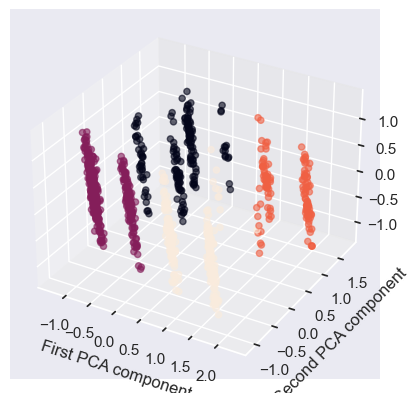

0.5013585093638913


In [107]:
#na osnovu prethodnog grafikona smo zakljucili da za epsilon parametar odgovarajuca vrednost bude oko 1.1
clustering = DBSCAN(eps=1.1, min_samples = 5).fit_predict(data_subset)
data_dbscan_labeled = data_subset.copy()
data_dbscan_labeled['Cluster_No']= clustering
ax = plt.axes(projection ="3d") 
ax.scatter3D(pca_components[0], pca_components[1], pca_components[2], c =data_dbscan_labeled['Cluster_No'],alpha = .6)
plt.xlabel('First PCA component')
plt.ylabel('Second PCA component')
plt.show()
score = silhouette_score(data_subset, clustering)
print(score)
#leva strana je ponovo problematicna, ali je makar sada cela tretirana kao isti klaster

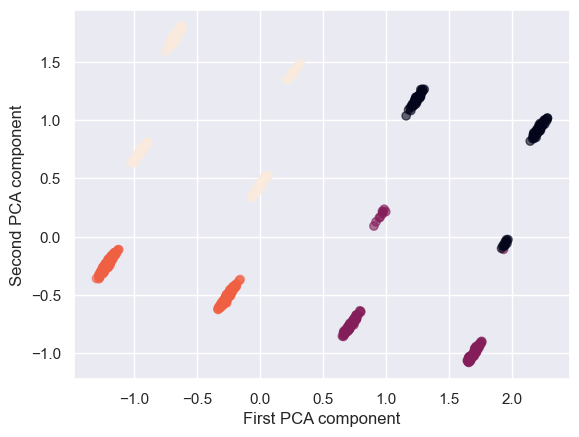

0.5013585093638913


In [108]:
#pokusavamo sa sledecim modelom, u nadi da dobijemo jos bolju diferencijaciju
gaussian_model = GaussianMixture(n_components=4)
gaussian_result = gaussian_model.fit_predict(data_subset)
data_gaussian_mix = data_subset.copy()
data_gaussian_mix['Cluster_No'] = gaussian_result
plt.scatter(pca_components[0], pca_components[1], c =data_gaussian_mix['Cluster_No'],alpha = .6)
plt.xlabel('First PCA component')
plt.ylabel('Second PCA component')
plt.show()
score = silhouette_score(data_subset, gaussian_result, metric='euclidean')
print(score)

In [109]:
#trodimenzionalna varijanta prethodnog prikaza
ax = plt.axes(projection ="3d") 
ax.scatter3D(pca_components[0], pca_components[1], pca_components[2], c =data_gaussian_mix['Cluster_No'],alpha = .6)
plt.show()

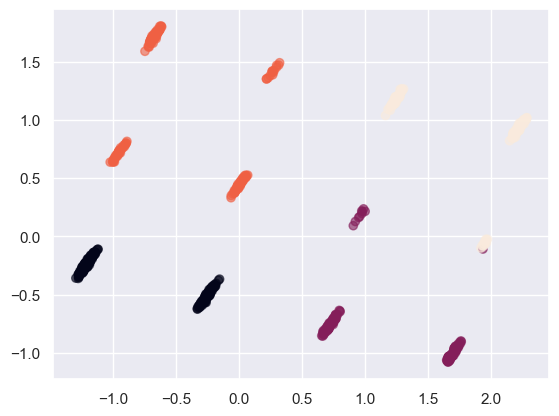

0.5013585093638913


In [110]:
#pokusavamo varijantu sa hijerarhijskim klusterovanjem
agglomerative_model = AgglomerativeClustering(n_clusters=4)
agglomerative_result = agglomerative_model.fit_predict(data_subset)
data_aglomerative = data_subset.copy()
data_aglomerative['Cluster_No'] = agglomerative_result
plt.scatter(pca_components[0], pca_components[1], c =data_aglomerative['Cluster_No'],alpha = .6)
plt.show()
score = silhouette_score(data_subset, agglomerative_result, metric='euclidean')
print(score)

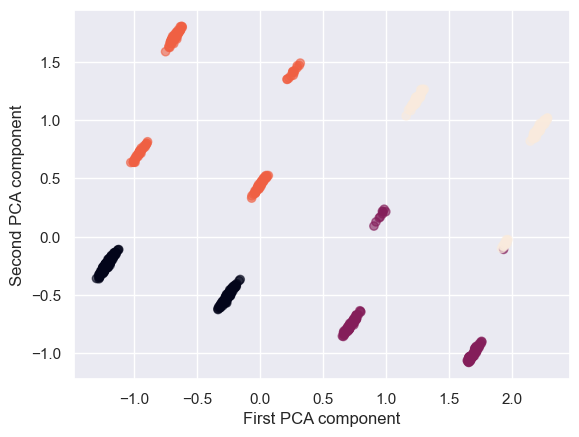

0.5013585093638913


In [111]:
#birch model
birch_model = Birch(threshold=0.01, n_clusters=4)
birch_result = birch_model.fit_predict(data_subset)
data_birch = data_subset.copy()
data_birch['Cluster_No'] = birch_result
plt.scatter(pca_components[0], pca_components[1], c =data_birch['Cluster_No'],alpha = .6)
plt.xlabel('First PCA component')
plt.ylabel('Second PCA component')
plt.show()
score = silhouette_score(data_subset, birch_result)
print(score)

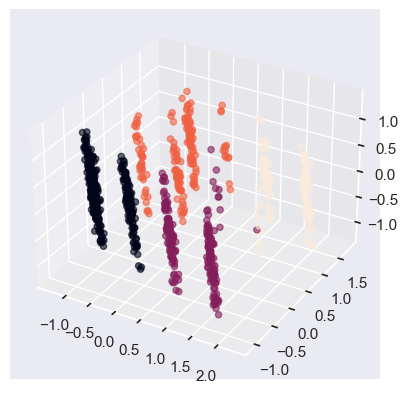

In [114]:
#trodimenzionalna varijanta prethodnog prikaza
ax = plt.axes(projection ="3d") 
ax.scatter3D(pca_components[0], pca_components[1], pca_components[2], c =data_birch['Cluster_No'],alpha = .6)
plt.show()

### Drugi podskup kolona za dalju analizu

In [119]:
#pravimo podskup dataseta za dalju analizu
cols_to_use =  ['Cars', 'Shopping', 'Theatre', 'PC', 'Ageing', 'Science and technology', 'Gender', 'Village - town']

data_subset = data_no_outliers[cols_to_use]
print(data_subset.head(10))

    Cars  Shopping  Theatre    PC  Ageing  Science and technology  Gender  \
0   0.00      0.75     0.25  0.50    0.00                    0.75       0   
1   0.25      0.50     0.25  0.75    0.50                    0.50       0   
2   0.00      0.75     1.00  0.25    0.00                    0.25       0   
4   0.50      0.50     0.25  0.25    0.25                    0.50       0   
5   1.00      0.25     0.00  0.75    0.00                    0.50       1   
6   0.75      0.50     0.50  0.00    0.75                    0.75       0   
7   0.00      0.50     0.25  0.75    0.00                    0.25       1   
8   0.00      0.25     1.00  0.00    0.25                    0.00       0   
9   0.00      0.75     1.00  0.00    0.50                    0.50       0   
10  0.25      1.00     0.25  1.00    0.00                    0.75       0   

    Village - town  
0                1  
1                0  
2                0  
4                1  
5                0  
6                1  
7    

[0.34000713 0.18624834 0.11116228 0.10250052 0.09068869]


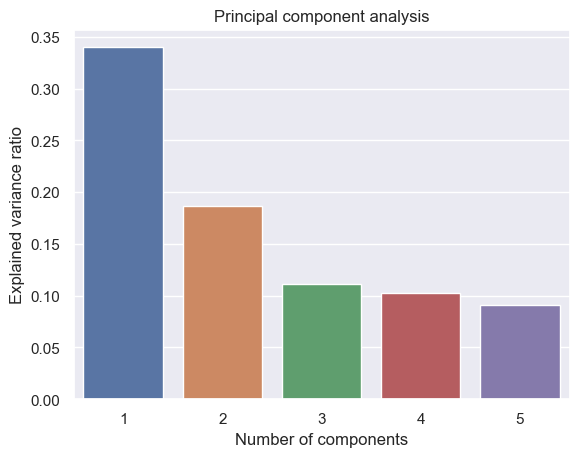

In [121]:
#radimo redukciju dimenzionalnosti sa Principal Component Analysis da bismo se prebacili u prostor nize dimenzije
pca = PCA(n_components=5)
principal_components = pca.fit_transform(data_subset)
print(pca.explained_variance_ratio_)
features = list(range(1, pca.n_components+1))
#radimo vizuelizaciju rezultata da bismo videli optimalan broj komponenti
sns.set()
sns.barplot(x = features, y= pca.explained_variance_ratio_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.title("Principal component analysis")
plt.show()

In [122]:
#na osnovu ovog grafikona zakljucujemo da bi optimalan broj klastera bio 4 ili 5 ('elbow method koriscen')
kmeans_model = KMeans(n_clusters = 4)
clusters = kmeans_model.fit_predict(data_subset)
data_subset['Cluster_No'] = clusters
score = silhouette_score(data_subset, clusters)
print(score)

0.4722962888020629


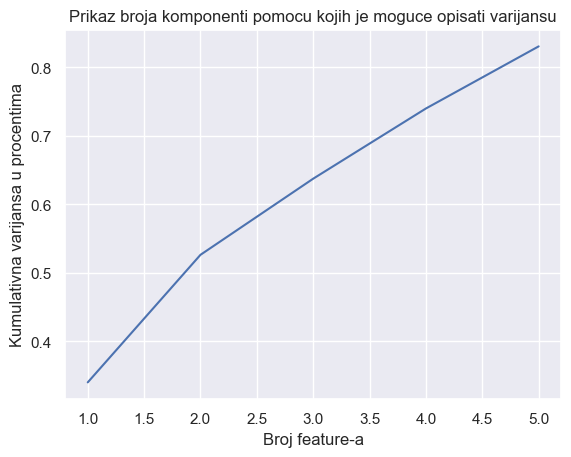

In [123]:
#kumulativna varijansa sa prikazom broja komponenti pomocu kojih je moguce opisati varijansu
fig, ax = plt.subplots()
x = np.arange(1, 6, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Broj feature-a')
plt.ylabel('Kumulativna varijansa u procentima')
plt.title('Prikaz broja komponenti pomocu kojih je moguce opisati varijansu')
plt.plot(x,y)
plt.show()

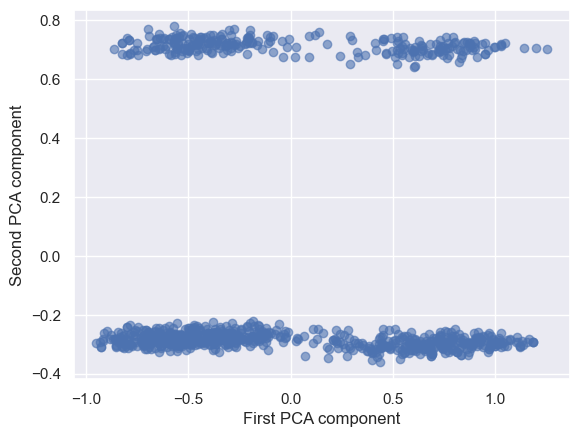

In [124]:
#dvodimenzionalna vizuelizacija podataka dobijenih pomocu PCA
pca_components = pd.DataFrame(principal_components)
plt.scatter(pca_components[0], pca_components[1], alpha = .6)
plt.xlabel('First PCA component')
plt.ylabel('Second PCA component')
plt.show()

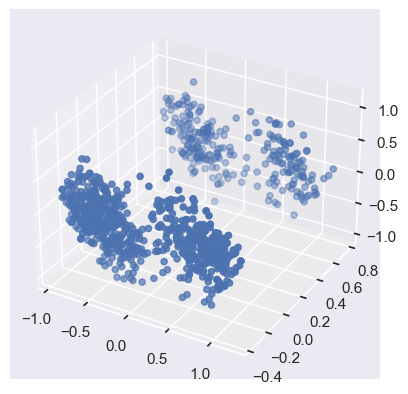

In [125]:
#prikaz u trodimenzionalnom prostoru
ax = plt.axes(projection ="3d")  
ax.scatter3D(pca_components[0], pca_components[1], pca_components[2])
plt.show()

In [126]:
#trazimo optimalan broj klustera
sum_of_squares = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i)
    k_means.fit(principal_components)
    sum_of_squares.append(k_means.inertia_)
plt.plot(range(1,11), sum_of_squares, marker = 'o')
plt.xlabel('Broj cluster-a')
plt.ylabel('Suma kvadrata')
plt.show()

In [128]:
# na osnovu ovog grafikona zakljucujemo da bi optimalan broj klastera bio 4 ili 5 ('elbow method koriscen')
kmeans_model = KMeans(n_clusters = 4)
clusters = kmeans_model.fit_predict(data_subset)
data_subset['Cluster_No'] = clusters
score = silhouette_score(data_subset, clusters)
print(score)

0.47921826204134427


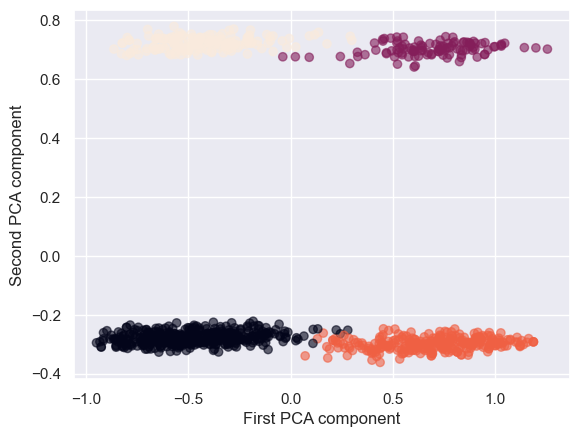

In [129]:
#vizuelizacija rezultata za kmeans
pca_components = pd.DataFrame(principal_components)
plt.scatter(pca_components[0], pca_components[1], c =data_subset['Cluster_No'],alpha = .6)
plt.xlabel('First PCA component')
plt.ylabel('Second PCA component')
plt.show()

In [130]:
#vizuelizacija dobijenih rezultata u trodimenzionalnom prostoru
ax = plt.axes(projection ="3d") 
ax.scatter3D(pca_components[0], pca_components[1], pca_components[2], c = data_subset['Cluster_No'])
plt.show()

In [131]:
#prikaz broja clanova po klasteru
print(data_subset['Cluster_No'].value_counts())

0    411
2    273
3    166
1    109
Name: Cluster_No, dtype: int64


In [132]:
#prikaz kodiranje radi tumacenja rezultata
#{'female': 0, 'male': 1}
#{'city': 0, 'village': 1}
#sa leve strane su normalizovane vrednosti odgovora iz ankete (1 - 5, normalizovano: 0 - 1)

**0 klaster je najveci klaster i u njemu su samo pripadnice zenskog pola i sve su iz grada, nema pripadnica iz ruralnih okruzenja.**

Prema podacima, imaju srednji strah od starenja i imaju blago interesovanje za PC, srednje interesovanje za pozoriste i veliko interesovanje za shopping, a nisu zainsteresovane za automobile, dok su za nauku srednje zainsteresovane.

In [133]:
#istrazivanje prvog klastera (najmanji klaster po broju clanova)
data_cluster_one = data_subset[data_subset['Cluster_No'] == 0]
for col in cols_to_use:
    print(data_cluster_one[col].value_counts())

0.00    168
0.25    107
0.50     67
0.75     43
1.00     26
Name: Cars, dtype: int64
1.00    141
0.75    112
0.50     94
0.25     43
0.00     21
Name: Shopping, dtype: int64
0.50    125
1.00    105
0.75     83
0.25     72
0.00     26
Name: Theatre, dtype: int64
0.25    127
0.50    111
0.00     78
0.75     70
1.00     25
Name: PC, dtype: int64
0.50    102
0.00    100
0.25     83
0.75     64
1.00     62
Name: Ageing, dtype: int64
0.50    140
0.25    104
0.75     70
0.00     60
1.00     37
Name: Science and technology, dtype: int64
0    411
Name: Gender, dtype: int64
0    411
Name: Village - town, dtype: int64


**U klasteru broj 3 su samo pripadnice zenskog pola i sve su iz ruralnih sredina, nema pripadnica iz grada.**

One imaju srednju fobiju od starenja, srednje interesovanje za PC, nauku i pozoriste, takodje imaju i srednje interesovanje za shopping, dok nisu zainteresovane za automobile.

In [134]:
#istrazivanje prvog klastera (najmanji klaster po broju clanova)
data_cluster_one = data_subset[data_subset['Cluster_No'] == 3]
for col in cols_to_use:
    print(data_cluster_one[col].value_counts())

0.00    70
0.50    38
0.25    33
0.75    15
1.00    10
Name: Cars, dtype: int64
0.50    49
1.00    45
0.75    44
0.25    23
0.00     5
Name: Shopping, dtype: int64
0.50    46
0.75    44
1.00    33
0.25    29
0.00    14
Name: Theatre, dtype: int64
0.50    45
0.25    45
0.00    33
0.75    27
1.00    16
Name: PC, dtype: int64
0.50    51
0.00    42
1.00    31
0.25    25
0.75    17
Name: Ageing, dtype: int64
0.50    53
0.25    35
0.75    33
1.00    23
0.00    22
Name: Science and technology, dtype: int64
0    166
Name: Gender, dtype: int64
1    166
Name: Village - town, dtype: int64


**U klasteru broj 2 su samo pripadnici muskog pola i svi su iz gradske sredine, nema pripadnika sa sela.**

Nemaju strah od starenja. Dosta su zainteresovani za PC, nauku i automobile, a vrlo slabo su zainteresovani za pozoriste i shopping.

In [135]:
#istrazivanje prvog klastera (najmanji klaster po broju clanova)
data_cluster_one = data_subset[data_subset['Cluster_No'] == 2]
for col in cols_to_use:
    print(data_cluster_one[col].value_counts())

1.00    81
0.75    61
0.50    57
0.25    38
0.00    36
Name: Cars, dtype: int64
0.25    88
0.50    70
0.75    49
0.00    48
1.00    18
Name: Shopping, dtype: int64
0.00    78
0.25    70
0.50    64
0.75    43
1.00    18
Name: Theatre, dtype: int64
1.00    110
0.75     70
0.50     64
0.25     20
0.00      9
Name: PC, dtype: int64
0.00    108
0.25     55
0.50     55
0.75     29
1.00     26
Name: Ageing, dtype: int64
1.00    93
0.75    76
0.50    63
0.25    28
0.00    13
Name: Science and technology, dtype: int64
1    273
Name: Gender, dtype: int64
0    273
Name: Village - town, dtype: int64


**U klasteru broj 1 su sve pripadnici muskog pola i svi su iz ruralne sredine, nema pripadnika iz grada. Ovo je ujedno i najmanji klaster.**

Nemaju strah od starenja i imaju jako interesovanje za PC, slabo se interesuju za pozoriste, imaju srednje interesovanje za shopping i veliko interesovanje za automobile. Nisu potpuno, ali su uglavnom zainteresovani za nauku. 

In [136]:
#istrazivanje prvog klastera (najmanji klaster po broju clanova)
data_cluster_one = data_subset[data_subset['Cluster_No'] == 1]
for col in cols_to_use:
    print(data_cluster_one[col].value_counts())

1.00    34
0.75    26
0.50    23
0.25    17
0.00     9
Name: Cars, dtype: int64
0.50    35
0.25    32
0.75    21
0.00    12
1.00     9
Name: Shopping, dtype: int64
0.25    34
0.50    27
0.00    25
0.75    14
1.00     9
Name: Theatre, dtype: int64
1.00    35
0.75    30
0.50    29
0.25    11
0.00     4
Name: PC, dtype: int64
0.00    39
0.50    26
0.25    24
0.75    11
1.00     9
Name: Ageing, dtype: int64
0.75    39
1.00    38
0.50    15
0.25     9
0.00     8
Name: Science and technology, dtype: int64
1    109
Name: Gender, dtype: int64
1    109
Name: Village - town, dtype: int64


In [137]:
#Sledeci potencijalni algoritam je DBSCAN koji je density based
clustering = DBSCAN().fit(data_subset)
data_dbscan_labeled = data_subset.copy()
data_dbscan_labeled['Cluster_No']= clustering.labels_ 
plt.scatter(pca_components[0], pca_components[1], c =data_dbscan_labeled['Cluster_No'],alpha = .6)
plt.xlabel('First PCA component')
plt.ylabel('Second PCA component')
plt.show()
#diferencijacija klastera ne deluje odgovarajuce sa defaultnim parametrima

In [138]:
#default parametri za DBSCAN ne daju dobre parametre, tezimo ka optimizaciji parametara
nearest_neighbors = NearestNeighbors(n_neighbors=10)
neighbors = nearest_neighbors.fit(data_subset)

distances, indices = neighbors.kneighbors(data_subset)
distances = np.sort(distances[:,9], axis=0)
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

In [139]:
#na osnovu prethodnog grafikona smo zakljucili da za epsilon parametar odgovarajuca vrednost bude oko 1.1
clustering = DBSCAN(eps=1, min_samples = 10).fit_predict(data_subset)
data_dbscan_labeled = data_subset.copy()
data_dbscan_labeled['Cluster_No']= clustering
ax = plt.axes(projection ="3d") 
ax.scatter3D(pca_components[0], pca_components[1], pca_components[2], c =data_dbscan_labeled['Cluster_No'],alpha = .6)
plt.show()
score = silhouette_score(data_subset, clustering)
print(score)

0.47921826204134427
